In [30]:
#降维
import pandas as pd
import numpy as np
data = pd.read_csv('iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [31]:
#define X and Y
X = data.drop(['Species','label'],axis=1)
Y = data.loc[:,'label']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [32]:
#estabish KNN model and calculate the accuracy
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,Y)
Y_predict = KNN.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y,Y_predict)
print(accuracy)

0.96


In [41]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)
print(X_norm)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [43]:
#calculate the mean and sigma
X1_mean = X.loc[:,'Sepal.Length'].mean()
X1_norm_mean = X_norm[:,0].mean()
X1_sigma = X.loc[:,'Sepal.Length'].std()
X1_norm_sigma = X_norm[:,0].std()
print(X1_mean,X1_sigma,X1_norm_mean,X1_norm_sigma)

5.843333333333334 0.8280661279778629 -4.736951571734001e-16 1.0


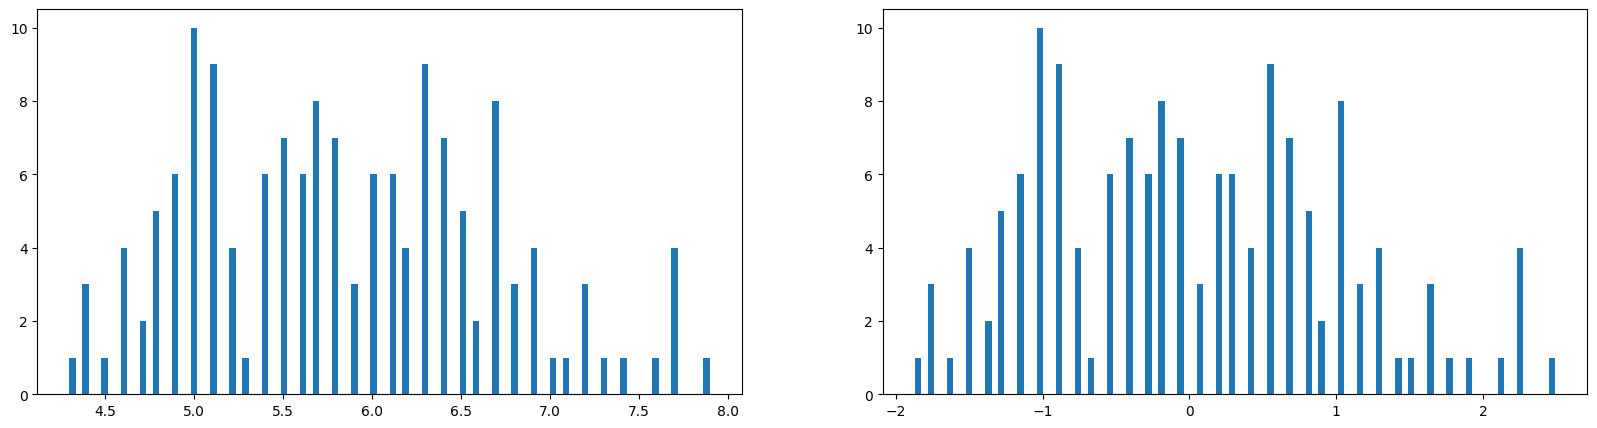

In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(X.loc[:,'Sepal.Length'],bins=100)
plt.subplot(122)
plt.hist(X_norm[:,0],bins=100)
plt.show()

In [45]:
print(X.shape)

(150, 4)


In [46]:
#PCA analysis
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_norm)
#calculate the variance ratio of each principle components
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.72962445 0.22850762 0.03668922 0.00517871]


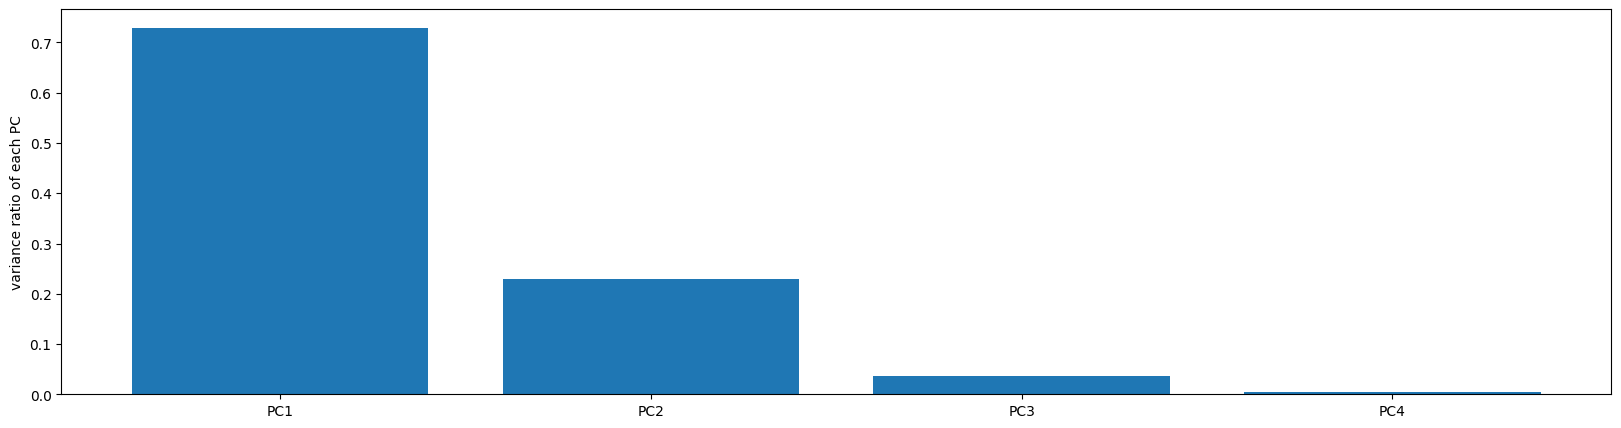

In [47]:
fig2 = plt.figure(figsize=(20,5))
plt.bar([1,2,3,4],var_ratio)
plt.xticks([1,2,3,4],['PC1','PC2','PC3','PC4'])
plt.ylabel('variance ratio of each PC')
plt.show()

In [48]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
X_pca.shape

(150, 2)

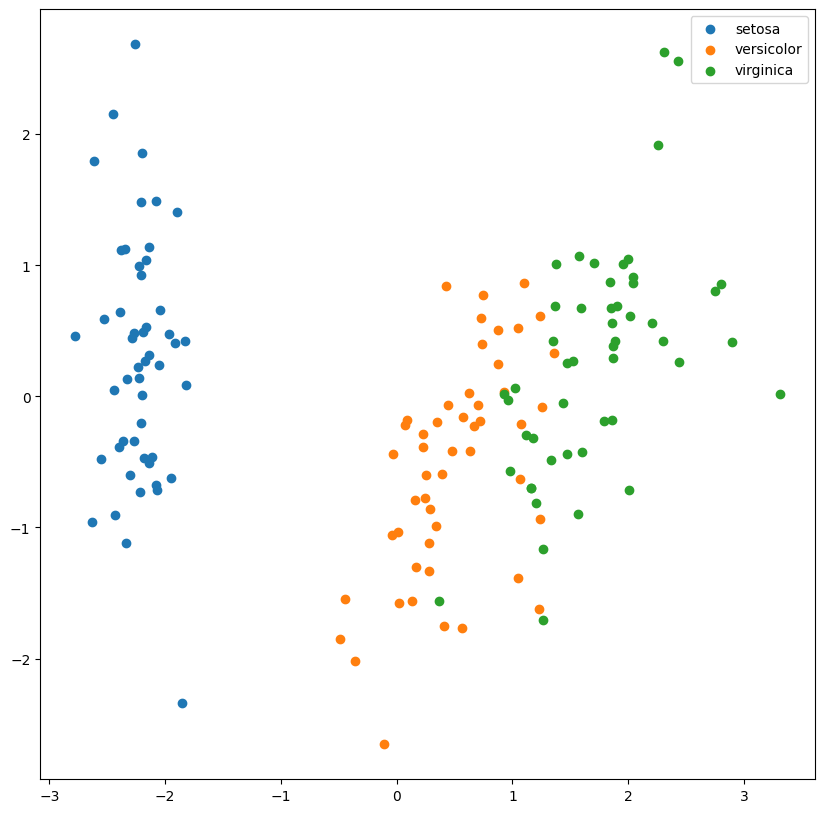

In [53]:
#visualize the PCA results
fig3 = plt.figure(figsize=(10,10))
setosa = plt.scatter(X_pca[:,0][Y==0],X_pca[:,1][Y==0])
versicolor = plt.scatter(X_pca[:,0][Y==1],X_pca[:,1][Y==1])
virginica = plt.scatter(X_pca[:,0][Y==2],X_pca[:,1][Y==2])
plt.legend((setosa,versicolor,virginica),('setosa','versicolor','virginica'))
plt.show()

In [54]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_pca,Y)
Y_predict = KNN.predict(X_pca)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y,Y_predict)
print(accuracy)

0.9466666666666667
